## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mousedata = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
combined_mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mouse_count = mouse_metadata['Mouse ID'].count()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_mousedata['Mouse ID'].value_counts().head()
# Analysis: Each Mouse ID should be assocaited with 10 TimePoints and therefore be counted 10 times; 
#therefore 'g989' is associated to two many Time codes (count = 13)

g989    13
m269    10
s337    10
w575    10
b128    10
Name: Mouse ID, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_mousedata_MouseID = combined_mousedata.set_index('Mouse ID')
mouse_g989 = combined_mousedata_MouseID.loc['g989',:]
mouse_g989.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mousedata_clean = combined_mousedata_MouseID.drop(index='g989')
clean_combined_mousedata = combined_mousedata_clean.reset_index()
clean_combined_mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.(expecting 249 -1 = 248)
mouse_count_2 = clean_combined_mousedata['Mouse ID'].nunique()
mouse_count_2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Vol_mean_1 = clean_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
Vol_median_1 = clean_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
Vol_variance_1 = clean_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Vol_stdev_1 = clean_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std() 
Vol_sem_1 = clean_combined_mousedata.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_stats_1 = {'Volume Mean': Vol_mean_1,
                  'Volume Median':Vol_median_1,
                  'Volume Variance': Vol_variance_1,
                  'Volume St. Deviation': Vol_stdev_1,
                  'Volume Sem':Vol_sem_1}
summary_stats_1_df = pd.DataFrame(summary_stats_1)

summary_stats_1_df


                                                

,Volume Mean,Volume Median,Volume Variance,Volume St. Deviation,Volume Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_2 = clean_combined_mousedata.groupby('Drug Regimen').agg(\
    Vol_mean = ('Tumor Volume (mm3)',np.mean),\
    Vol_median = ('Tumor Volume (mm3)',np.median),\
    Vol_variance = ('Tumor Volume (mm3)',np.var),\
    Vol_stdev = ('Tumor Volume (mm3)',np.std),\
    Vol_sem = ('Tumor Volume (mm3)',st.sem),\
    ).round(2)

summary_stats_2
                     

,Vol_mean,Vol_median,Vol_variance,Vol_stdev,Vol_sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

AxesSubplot(0.125,0.125;0.775x0.755)


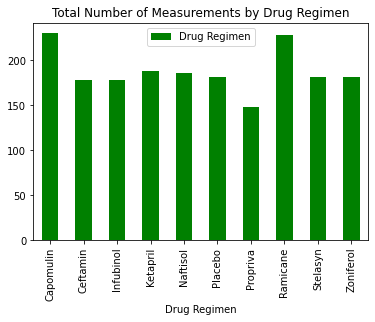

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen = clean_combined_mousedata.groupby('Drug Regimen')
drug_regimen_total_df = pd.DataFrame(drug_regimen['Drug Regimen'].count())
drug_regimen_bar_chart = drug_regimen_total_df.plot(kind = 'bar', title = "Total Number of Measurements by Drug Regimen", color = 'green')

print(drug_regimen_bar_chart)


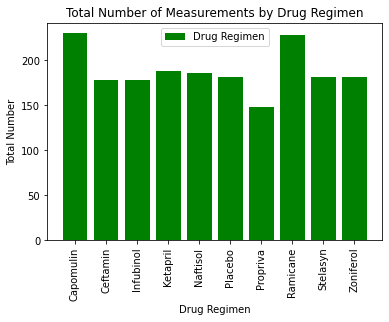

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_regimen_total_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,drug_regimen_total_df['Drug Regimen'], color = 'green')
plt.xticks(tick_locations,list(drug_regimen_total_df.index), rotation = 'vertical')

legend_name = ['Drug Regimen']
plt.legend(legend_name, loc = 'best')

plt.title('Total Number of Measurements by Drug Regimen')
plt.xlabel('Drug Regimen') 
plt.ylabel('Total Number')
    
plt.show()    

<AxesSubplot:title={'center':'Female Versus Male Mice'}, ylabel='Sex'>

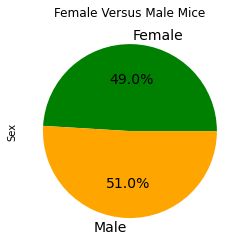

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = clean_combined_mousedata.groupby('Sex')
mouse_sex_total_df = pd.DataFrame(mouse_sex['Sex'].count())
mouse_sex_total_df.head()

mouse_sex_total_df.plot(kind = 'pie', y= 'Sex', title = 'Female Versus Male Mice', fontsize = 14, 
                        colors = ['green','orange'], legend = False, autopct = '%1.1f%%')


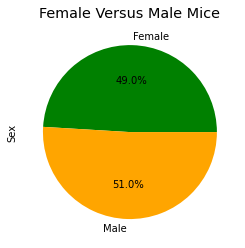

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_2 = list(mouse_sex_total_df.index.values)
mouse_sex_count = mouse_sex_total_df['Sex']
colors = ['green','orange']
plt.pie(mouse_sex_count, labels = mouse_sex_2, colors = colors, autopct = '%1.1f%%')
plt.rcParams['font.size'] = 12
plt.title('Female Versus Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_combined_mousedata_df = pd.DataFrame(clean_combined_mousedata)
# Start by getting the last (greatest) timepoint for each mouse
MouseID = clean_combined_mousedata_df.groupby('Mouse ID')

last_timepoint_df = MouseID['Timepoint'].max().to_frame()
last_timepoint_df.reset_index(inplace = True)
last_timepoint_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Merge_LastTP_tumorvol_df = pd.merge(clean_combined_mousedata_df, last_timepoint_df)
Merge_LastTP_tumorvol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
CMIC_Drug_list =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in CMIC_Drug_list:

    tumor_volumes = Merge_LastTP_tumorvol_df.loc[Merge_LastTP_tumorvol_df['Drug Regimen'] == drug,'Tumor Volume (mm3)']   
    
    # add subset 
    
    tumor_vol.append(tumor_volumes)
       
# Determine outliers using upper and lower bounds
quartiles = tumor_volumes.quantile([.25,.5,.75])
first_quartile = quartiles[0.25]
second_quartile = quartiles[0.50]
third_quartile = quartiles[0.75]
IQR = third_quartile - first_quartile
low_threshold = first_quartile - 1.5*IQR
high_threshold = third_quartile + 1.5*IQR
outliers = tumor_volumes.loc[(tumor_volumes<low_threshold)|(tumor_volumes>high_threshold)]


print(drug,outliers)

Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Tumor Volume per Drug regimen')

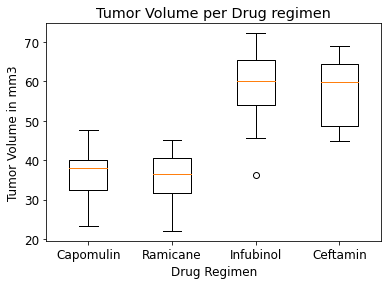

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = CMIC_Drug_list)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume in mm3')

plt.title('Tumor Volume per Drug regimen')

## Line and Scatter Plots

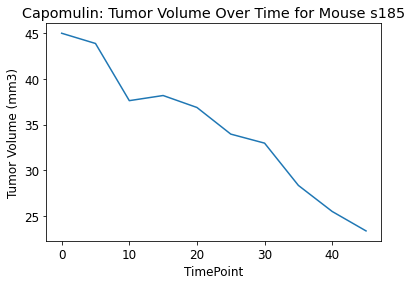

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = clean_combined_mousedata.loc[clean_combined_mousedata['Drug Regimen']=='Capomulin']
#Capomulin.head(30) - Use to select mouse

#Select mouse s185
Capomulin_mouse = Capomulin.loc[Capomulin['Mouse ID']=='s185']
#Capomulin_mouse - confirm output of line 6

#Construct Line graph (General rule of line graphs: X-axis is time)
x_axis = Capomulin_mouse['Timepoint']
y_axis = Capomulin_mouse['Tumor Volume (mm3)']
plt.xlabel('TimePoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin: Tumor Volume Over Time for Mouse s185')
plt.plot(x_axis, y_axis)
plt.show()


Text(0.5, 1.0, 'Capomulin: Average Weight vs Tumor Volume')

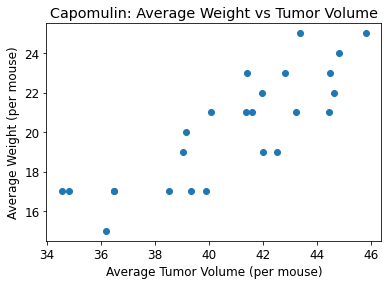

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_volume = Capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_mouse_weight = Capomulin.groupby(['Mouse ID'])['Weight (g)'].mean()

x_axis = avg_tumor_volume
y_axis = avg_mouse_weight

plt.scatter(x_axis, y_axis)
plt.xlabel('Average Tumor Volume (per mouse)')
plt.ylabel('Average Weight (per mouse)')
plt.title('Capomulin: Average Weight vs Tumor Volume')
          

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
